In [2]:
import pandas as pd
import numpy as np

In [6]:
!ls

gender_submission.csv  test.csv  titanic.zip  train.csv  Untitled.ipynb


In [3]:
df = pd.read_csv("train.csv")

In [5]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Manipulation de dataframe

In [25]:
df.query("Pclass == 3 and not Cabin.isnull()")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S


In [12]:
all_cabins = df.query("Pclass == 3")["Cabin"]

In [14]:
all_cabins

0      NaN
2      NaN
4      NaN
5      NaN
7      NaN
      ... 
882    NaN
884    NaN
885    NaN
888    NaN
890    NaN
Name: Cabin, Length: 491, dtype: object

In [26]:
all_cabins.isna().all()

False

On a bien des passagers qui voyageaient en troisième classe et qui avaient une cabine.

In [27]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


On observe qu'il manque certaines informations, notamment pour l'âge.

In [29]:
import matplotlib.pyplot as plt

In [42]:
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(20, 15))

# Size of matplotlib histogram bins
bin_size = 10

In [30]:
fig = plt.figure()
fig_dims = (3,2)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Age Histogram')

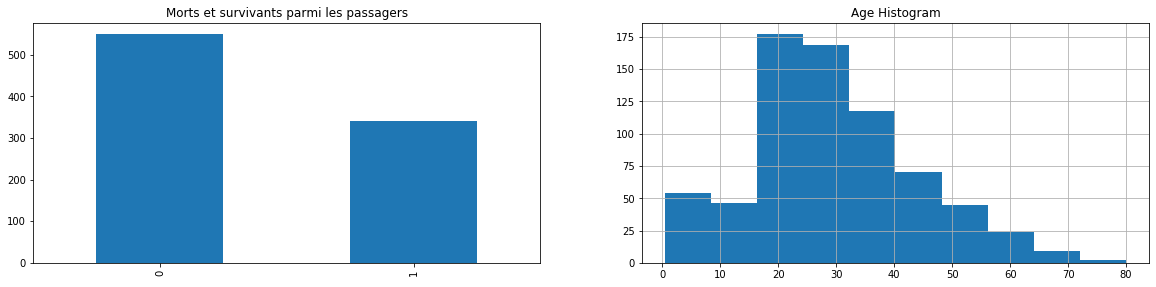

In [44]:
plt.subplot2grid(fig_dims, (0, 0))
df["Survived"].value_counts().plot(kind='bar', title="Morts et survivants parmi les passagers")

# Plot the Age histogram
plt.subplot2grid(fig_dims, (0, 1))
df['Age'].hist()
plt.title('Age Histogram')

In [46]:
pclass_xt = pd.crosstab(df['Pclass'], df['Survived'])
pclass_xt


Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [54]:
pd.crosstab(pd.cut(df['Age'], 5), df['Survived'])

Survived,0,1
Age,,
"(0.34, 16.336]",45,55
"(16.336, 32.252]",218,128
"(32.252, 48.168]",112,76
"(48.168, 64.084]",39,30
"(64.084, 80.0]",10,1


In [56]:
pd.crosstab(df["Sex"], df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


Dans le notebook original https://github.com/donnemartin/data-science-ipython-notebooks/blob/master/kaggle/titanic.ipynb il y a encore beaucoup d'exemples de manipulations sur la dataframe

In [60]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
df_train = df.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"], axis=1)

In [67]:
df_train = df_train[["Pclass", "Sex", "Age", "Survived"]]

In [70]:
?df_train.replace

In [72]:
df_train["Sex"] = df_train["Sex"].replace({"male":0, "female":1})

In [73]:
df_train.head()

,Pclass,Sex,Age,Survived
0,3,0,22.0,0
1,1,1,38.0,1
2,3,1,26.0,1
3,1,1,35.0,1
4,3,0,35.0,0


In [79]:
mean_age = df_train["Age"].mean()

In [81]:
df_train = df_train.fillna(mean_age)

In [82]:
df_train.values

array([[ 3.        ,  0.        , 22.        ,  0.        ],
       [ 1.        ,  1.        , 38.        ,  1.        ],
       [ 3.        ,  1.        , 26.        ,  1.        ],
       ...,
       [ 3.        ,  1.        , 29.69911765,  0.        ],
       [ 1.        ,  0.        , 26.        ,  1.        ],
       [ 3.        ,  0.        , 32.        ,  0.        ]])

In [83]:
df_train.values[:, :3]

array([[ 3.        ,  0.        , 22.        ],
       [ 1.        ,  1.        , 38.        ],
       [ 3.        ,  1.        , 26.        ],
       ...,
       [ 3.        ,  1.        , 29.69911765],
       [ 1.        ,  0.        , 26.        ],
       [ 3.        ,  0.        , 32.        ]])

En machine learning en général on essaye de prédire une variable 'y' en fonction des données 'X'. La régression logistique trouve les paramètres pour modéliser y comme
$y = α_1 X_1 + α_2 X_2 + …$

In [75]:
from sklearn.linear_model import LogisticRegression

In [84]:
lr = LogisticRegression()
lr.fit(X = df_train.values[:, :3],
       y = df_train.values[:, -1])

LogisticRegression()

In [86]:
lr.coef_

array([[-1.13811533,  2.51919174, -0.03284127]])